## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## Reading the CSV file

In [2]:
df = pd.read_csv('water.csv') # Reading the csv file.
df.head() # gives the preview of the dataset.

,Table Name,State Code,District code,Tehsil Code,Town Code,Area Name,Total/Rural/Urban,Location of source of drinking water,Total Number of Households,Tapwater from treated source,Tapwater from\nuntreated source,Covered well,Uncovered well,Handpump,Tubewell/Borehole,Spring,River/\nCanal,Tank/\nPond/\nLake,Other sources
0,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,Total,Total,"1,31,79,911","54,32,724","32,74,240","1,31,305","10,51,685","7,29,630","21,01,712","42,476","1,07,435","1,24,772","1,83,932"
1,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,Total,Within the premises,"58,59,220","36,33,255","9,25,455","68,784","5,29,326","50,661","6,51,739",NaN,NaN,NaN,NaN
2,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,Total,Near the premises,"49,19,991","13,55,708","18,06,626","32,013","2,63,702","3,23,116","9,26,063","25,037","61,405","52,627","73,694"
3,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,Total,Away,"24,00,700","4,43,761","5,42,159","30,508","2,58,657","3,55,853","5,23,910","17,439","46,030","72,145","1,10,238"
4,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,Rural,Total,"78,64,196","17,97,502","26,34,613","79,637","8,55,626","6,62,370","15,39,109","36,216","86,262","1,06,694","66,167"


In [3]:
df.shape # to get the total number of rows and columns in the dataset.

(3924, 19)

In [4]:
df.info() # this renders the information of the data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Table Name                            3921 non-null   object 
 1   State Code                            3923 non-null   object 
 2   District code                         3920 non-null   float64
 3   Tehsil Code                           3920 non-null   float64
 4   Town Code                             3920 non-null   float64
 5   Area Name                             3920 non-null   object 
 6   Total/Rural/Urban                     3920 non-null   object 
 7   Location of source of drinking water  3920 non-null   object 
 8   Total Number of Households            3920 non-null   object 
 9   Tapwater from treated source          3918 non-null   object 
 10  Tapwater from
untreated source        3917 non-null   object 
 11  Covered well     

In [5]:
df.isnull().sum()/len(df)*100 # calculates the percentage of null values present in each columns.

Table Name                              0.076453
State Code                              0.025484
District code                           0.101937
Tehsil Code                             0.101937
Town Code                               0.101937
Area Name                               0.101937
Total/Rural/Urban                       0.101937
Location of source of drinking water    0.101937
Total Number of Households              0.101937
Tapwater from treated source            0.152905
Tapwater from\nuntreated source         0.178389
Covered well                            0.356779
Uncovered well                          0.280326
Handpump                                0.433231
Tubewell/Borehole                       0.356779
Spring                                  2.370031
River/\nCanal                           2.650357
Tank/\nPond/\nLake                      2.446483
 Other sources                          1.783894
dtype: float64

In [6]:
numerical_columns = [
    'Total Number of Households', 'Tapwater from treated source',
    'Tapwater from\nuntreated source', 'Covered well', 'Uncovered well',
    'Handpump', 'Tubewell/Borehole', 'Spring', 'River/\nCanal',
    'Tank/\nPond/\nLake', ' Other sources'
]

# Remove commas from numerical columns and convert them to floats
for col in numerical_columns:
    df[col] = df[col].str.replace(',', '').astype(float, errors='ignore')

In [7]:
df.dropna(inplace=True)

In [8]:
print(df.isnull().sum())

Table Name                              0
State Code                              0
District code                           0
Tehsil Code                             0
Town Code                               0
Area Name                               0
Total/Rural/Urban                       0
Location of source of drinking water    0
Total Number of Households              0
Tapwater from treated source            0
Tapwater from\nuntreated source         0
Covered well                            0
Uncovered well                          0
Handpump                                0
Tubewell/Borehole                       0
Spring                                  0
River/\nCanal                           0
Tank/\nPond/\nLake                      0
 Other sources                          0
dtype: int64


In [9]:
df.describe()  #statistics of raw data.

,District code,Tehsil Code,Town Code,Total Number of Households,Tapwater from treated source,Tapwater from\nuntreated source,Covered well,Uncovered well,Handpump,Tubewell/Borehole,Spring,River/\nCanal,Tank/\nPond/\nLake,Other sources
count,1677.000000,1677.000000,1677.000000,1.677000e+03,1.677000e+03,1.677000e+03,1677.000000,1.677000e+03,1677.000000,1.677000e+03,1677.000000,1677.00000,1677.000000,1677.000000
mean,565.017889,5969.960644,100651.433512,7.528774e+04,2.758933e+04,2.003212e+04,711.828265,5.669706e+03,5009.799642,1.289473e+04,308.806798,780.72093,899.419201,1391.276088
std,42.388978,11514.580328,263867.717126,4.504021e+05,1.910229e+05,1.221879e+05,4347.128443,3.748982e+04,29652.033425,7.653350e+04,1759.492787,4392.80062,5307.863765,7977.420611
min,0.000000,0.000000,0.000000,2.060000e+02,2.100000e+01,5.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.00000,1.000000,1.000000
25%,561.000000,5447.000000,0.000000,9.016000e+03,2.272000e+03,1.434000e+03,43.000000,9.800000e+01,217.000000,9.090000e+02,7.000000,10.00000,9.000000,93.000000
50%,568.000000,5499.000000,0.000000,2.251900e+04,5.779000e+03,5.423000e+03,147.000000,4.550000e+02,927.000000,3.268000e+03,27.000000,92.00000,54.000000,241.000000
75%,575.000000,5556.000000,0.000000,4.790500e+04,1.349500e+04,1.505200e+04,400.000000,2.730000e+03,3326.000000,8.453000e+03,169.000000,422.00000,301.000000,623.000000
max,584.000000,99999.000000,803236.000000,1.317991e+07,5.432724e+06,3.274240e+06,131305.000000,1.051685e+06,729630.000000,2.101712e+06,42476.000000,107435.00000,124772.000000,183932.000000


In [10]:
df.to_csv('Cleaned_water.csv', index = False) # To store the cleaned data in new csv file.

In [11]:
water = pd.read_csv('Cleaned_water.csv')
water.head()

,Table Name,State Code,District code,Tehsil Code,Town Code,Area Name,Total/Rural/Urban,Location of source of drinking water,Total Number of Households,Tapwater from treated source,Tapwater from\nuntreated source,Covered well,Uncovered well,Handpump,Tubewell/Borehole,Spring,River/\nCanal,Tank/\nPond/\nLake,Other sources
0,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,Total,Total,13179911.0,5432724.0,3274240.0,131305.0,1051685.0,729630.0,2101712.0,42476.0,107435.0,124772.0,183932.0
1,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,Total,Near the premises,4919991.0,1355708.0,1806626.0,32013.0,263702.0,323116.0,926063.0,25037.0,61405.0,52627.0,73694.0
2,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,Total,Away,2400700.0,443761.0,542159.0,30508.0,258657.0,355853.0,523910.0,17439.0,46030.0,72145.0,110238.0
3,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,Rural,Total,7864196.0,1797502.0,2634613.0,79637.0,855626.0,662370.0,1539109.0,36216.0,86262.0,106694.0,66167.0
4,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,Rural,Near the premises,3822737.0,795229.0,1540160.0,25448.0,236692.0,300076.0,795747.0,19384.0,42623.0,40779.0,26599.0


## Labale Encoding
*  Total/Rural/Urban
* Location of scource of drinking water

In [12]:
le = LabelEncoder()
water['Total/Rural/Urban'] = le.fit_transform(water['Total/Rural/Urban'])

In [13]:
le.classes_

array(['Rural', 'Total', 'Urban'], dtype=object)

In [14]:
water.columns = water.columns.str.strip()

In [15]:
le = LabelEncoder()
water['Location of source of drinking water'] = le.fit_transform(water['Location of source of drinking water'])

In [16]:
le.classes_

array(['Away', 'Near the premises', 'Total'], dtype=object)

In [17]:
water.head()

,Table Name,State Code,District code,Tehsil Code,Town Code,Area Name,Total/Rural/Urban,Location of source of drinking water,Total Number of Households,Tapwater from treated source,Tapwater from\nuntreated source,Covered well,Uncovered well,Handpump,Tubewell/Borehole,Spring,River/\nCanal,Tank/\nPond/\nLake,Other sources
0,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,1,2,13179911.0,5432724.0,3274240.0,131305.0,1051685.0,729630.0,2101712.0,42476.0,107435.0,124772.0,183932.0
1,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,1,1,4919991.0,1355708.0,1806626.0,32013.0,263702.0,323116.0,926063.0,25037.0,61405.0,52627.0,73694.0
2,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,1,0,2400700.0,443761.0,542159.0,30508.0,258657.0,355853.0,523910.0,17439.0,46030.0,72145.0,110238.0
3,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,0,2,7864196.0,1797502.0,2634613.0,79637.0,855626.0,662370.0,1539109.0,36216.0,86262.0,106694.0,66167.0
4,HH2206,29,0.0,0.0,0.0,STATE KARNATAKA,0,1,3822737.0,795229.0,1540160.0,25448.0,236692.0,300076.0,795747.0,19384.0,42623.0,40779.0,26599.0


## Dropping the unusefull columns


In [18]:
water = water.drop(['Table Name', 'Tehsil Code', 'Town Code',], axis=1)

In [19]:
water.head()

,State Code,District code,Area Name,Total/Rural/Urban,Location of source of drinking water,Total Number of Households,Tapwater from treated source,Tapwater from\nuntreated source,Covered well,Uncovered well,Handpump,Tubewell/Borehole,Spring,River/\nCanal,Tank/\nPond/\nLake,Other sources
0,29,0.0,STATE KARNATAKA,1,2,13179911.0,5432724.0,3274240.0,131305.0,1051685.0,729630.0,2101712.0,42476.0,107435.0,124772.0,183932.0
1,29,0.0,STATE KARNATAKA,1,1,4919991.0,1355708.0,1806626.0,32013.0,263702.0,323116.0,926063.0,25037.0,61405.0,52627.0,73694.0
2,29,0.0,STATE KARNATAKA,1,0,2400700.0,443761.0,542159.0,30508.0,258657.0,355853.0,523910.0,17439.0,46030.0,72145.0,110238.0
3,29,0.0,STATE KARNATAKA,0,2,7864196.0,1797502.0,2634613.0,79637.0,855626.0,662370.0,1539109.0,36216.0,86262.0,106694.0,66167.0
4,29,0.0,STATE KARNATAKA,0,1,3822737.0,795229.0,1540160.0,25448.0,236692.0,300076.0,795747.0,19384.0,42623.0,40779.0,26599.0


<Axes: >

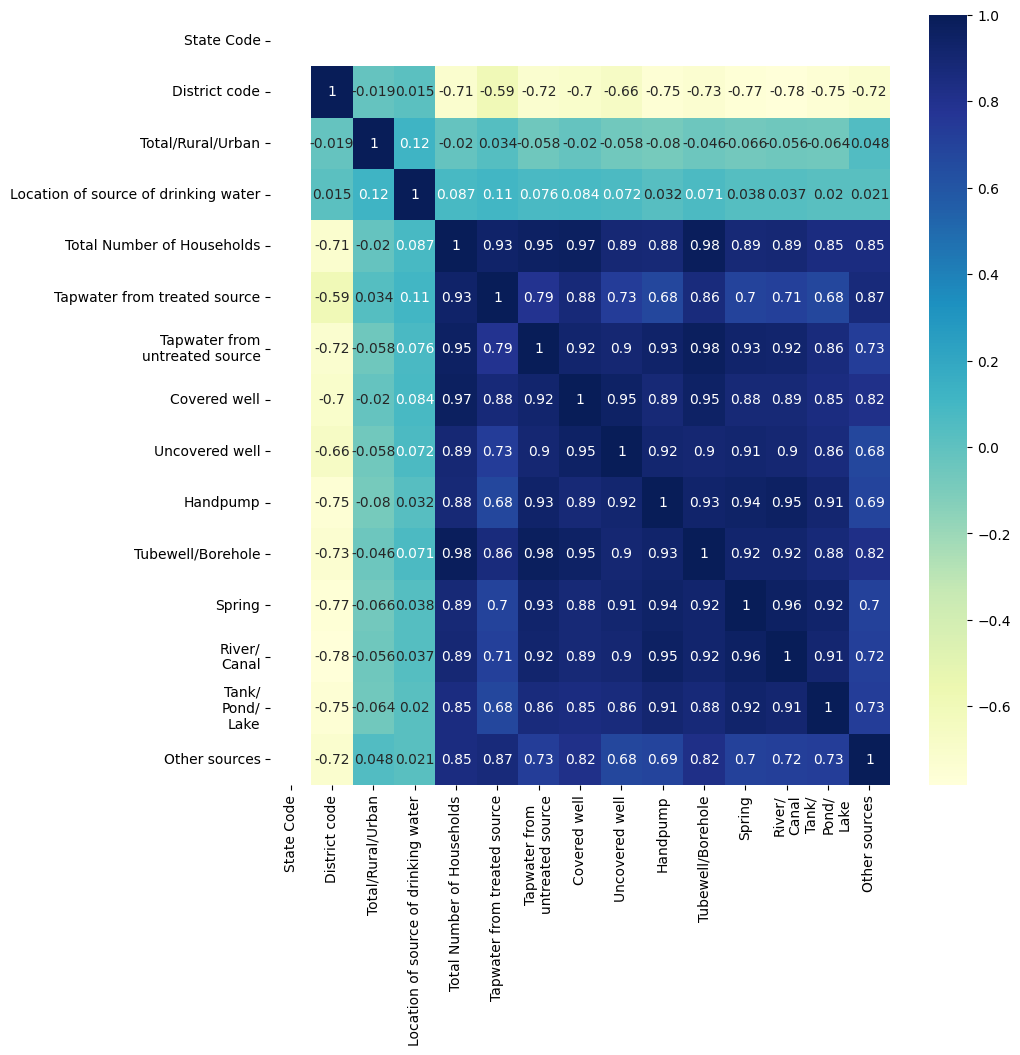

In [20]:
# heatmap
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(water.corr(numeric_only=True), annot=True, cmap = 'YlGnBu')

In [21]:
water.columns = water.columns.str.strip()

## Feature Selection

In [22]:
X = water.drop(['Location of source of drinking water', 'Area Name', 'State Code', 'District code'], axis=1)
y = water['Location of source of drinking water']

## Model
* Spliting X and Y
* Random Forest
* Random Forest by applying grid search
* Gradient Boost



## Random Forest

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, matthews_corrcoef

# Define features and target
X = water.drop(['Location of source of drinking water', 'Area Name', 'State Code', 'District code'], axis=1)
y = water['Location of source of drinking water']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Random Forest Classifier:\nAccuracy: {accuracy}\n")
print("Confusion Matrix:\n", conf_matrix)
print(f"Matthews Correlation Coefficient (MCC): {mcc}\n")
print(report)


Random Forest Classifier:
Accuracy: 0.8690476190476191

Confusion Matrix:
 [[129  11   9]
 [ 18 126  13]
 [  5  10 183]]
Matthews Correlation Coefficient (MCC): 0.8020241010830635

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       149
           1       0.86      0.80      0.83       157
           2       0.89      0.92      0.91       198

    accuracy                           0.87       504
   macro avg       0.87      0.86      0.86       504
weighted avg       0.87      0.87      0.87       504



## Applying grid search

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,matthews_corrcoef


# Define features and target
X = water.drop(['Location of source of drinking water', 'Area Name', 'State Code', 'District code'], axis=1)
y = water['Location of source of drinking water']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create the parameter grid
params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [2, 3, 5, 10, 25],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=params,
                           cv=5, n_jobs=-1, verbose=1, scoring="accuracy")

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Random Forest Classifier (Best Model):\nAccuracy: {accuracy}\n")
print("Confusion Matrix:\n", conf_matrix)
print(f"Matthews Correlation Coefficient (MCC): {mcc}\n")
print(report)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 30}
Random Forest Classifier (Best Model):
Accuracy: 0.8194444444444444

Confusion Matrix:
 [[126  17   6]
 [ 18 114  25]
 [  6  19 173]]
Matthews Correlation Coefficient (MCC): 0.7267380985958011

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       149
           1       0.76      0.73      0.74       157
           2       0.85      0.87      0.86       198

    accuracy                           0.82       504
   macro avg       0.82      0.82      0.82       504
weighted avg       0.82      0.82      0.82       504



## ROC

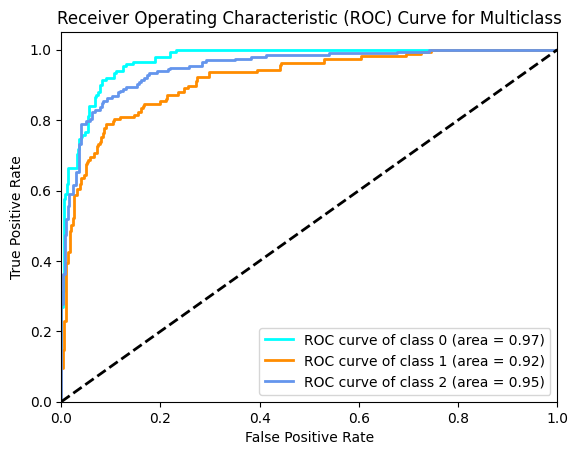

In [29]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Binarize the output for multiclass ROC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_probs = best_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


## Gradient Boost

In [30]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, matthews_corrcoef

# Apply Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Gradient Boosting Classifier:\nAccuracy: {accuracy}\n")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print(f"Matthews Correlation Coefficient (MCC): {mcc}\n")


Gradient Boosting Classifier:
Accuracy: 0.8472222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       149
           1       0.80      0.77      0.79       157
           2       0.87      0.90      0.88       198

    accuracy                           0.85       504
   macro avg       0.84      0.84      0.84       504
weighted avg       0.85      0.85      0.85       504

Confusion Matrix:
 [[128  14   7]
 [ 16 121  20]
 [  4  16 178]]
Matthews Correlation Coefficient (MCC): 0.7687399296479097



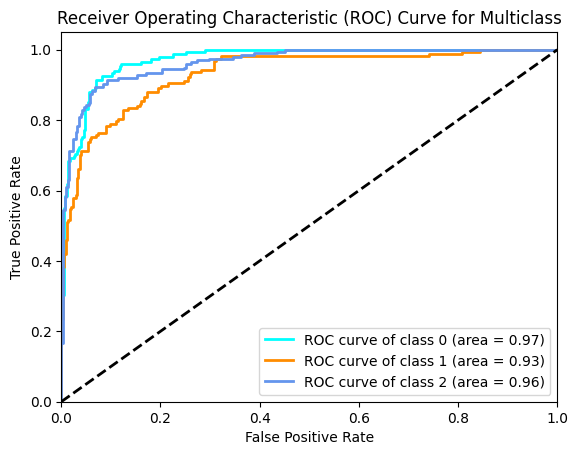

In [31]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import  roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output for multiclass ROC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_probs = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'navy', 'deeppink', 'lime', 'brown', 'red', 'purple', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


In [32]:

# Convert these columns to numeric, removing commas
water_sources = [
    'Tapwater from treated source', 'Tapwater from\nuntreated source', 'Covered well', 'Uncovered well',
    'Handpump', 'Tubewell/Borehole', 'Spring', 'River/\nCanal', 'Tank/\nPond/\nLake', 'Other sources'
]


# Calculate total water
water['Total Water'] = water[water_sources].sum(axis=1)

# Define function to classify area condition
def classify_condition(total_water):
    if total_water > 1000000:
        return 'Good'
    elif total_water > 500000:
        return 'Average'
    else:
        return 'Bad'

# Apply the classification
water['Condition'] = water['Total Water'].apply(classify_condition)

# Display the results
water[['Area Name', 'Total Water', 'Condition']].head()

,Area Name,Total Water,Condition
0,STATE KARNATAKA,13179911.0,Good
1,STATE KARNATAKA,4919991.0,Good
2,STATE KARNATAKA,2400700.0,Good
3,STATE KARNATAKA,7864196.0,Good
4,STATE KARNATAKA,3822737.0,Good


In [33]:
water.head(20)

,State Code,District code,Area Name,Total/Rural/Urban,Location of source of drinking water,Total Number of Households,Tapwater from treated source,Tapwater from\nuntreated source,Covered well,Uncovered well,Handpump,Tubewell/Borehole,Spring,River/\nCanal,Tank/\nPond/\nLake,Other sources,Total Water,Condition
0,29,0.0,STATE KARNATAKA,1,2,13179911.0,5432724.0,3274240.0,131305.0,1051685.0,729630.0,2101712.0,42476.0,107435.0,124772.0,183932.0,13179911.0,Good
1,29,0.0,STATE KARNATAKA,1,1,4919991.0,1355708.0,1806626.0,32013.0,263702.0,323116.0,926063.0,25037.0,61405.0,52627.0,73694.0,4919991.0,Good
2,29,0.0,STATE KARNATAKA,1,0,2400700.0,443761.0,542159.0,30508.0,258657.0,355853.0,523910.0,17439.0,46030.0,72145.0,110238.0,2400700.0,Good
3,29,0.0,STATE KARNATAKA,0,2,7864196.0,1797502.0,2634613.0,79637.0,855626.0,662370.0,1539109.0,36216.0,86262.0,106694.0,66167.0,7864196.0,Good
4,29,0.0,STATE KARNATAKA,0,1,3822737.0,795229.0,1540160.0,25448.0,236692.0,300076.0,795747.0,19384.0,42623.0,40779.0,26599.0,3822737.0,Good
5,29,0.0,STATE KARNATAKA,0,0,1949490.0,285521.0,466147.0,23713.0,237548.0,325486.0,445121.0,16832.0,43639.0,65915.0,39568.0,1949490.0,Good
6,29,0.0,STATE KARNATAKA,2,2,5315715.0,3635222.0,639627.0,51668.0,196059.0,67260.0,562603.0,6260.0,21173.0,18078.0,117765.0,5315715.0,Good
7,29,0.0,STATE KARNATAKA,2,1,1097254.0,560479.0,266466.0,6565.0,27010.0,23040.0,130316.0,5653.0,18782.0,11848.0,47095.0,1097254.0,Good
8,29,0.0,STATE KARNATAKA,2,0,451210.0,158240.0,76012.0,6795.0,21109.0,30367.0,78789.0,607.0,2391.0,6230.0,70670.0,451210.0,Bad
9,29,555.0,District Belgaum,1,2,963825.0,353192.0,167328.0,14474.0,124332.0,75729.0,186601.0,4088.0,24013.0,4006.0,10062.0,963825.0,Average
